In [1]:
#Importing all the required library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the Train Dataset
Traindf=pd.read_excel('C:/Users/User/Documents/Data Trained/Data-Science-ML-Capstone-Projects-master/Participants_Data_Final/Data_Train.xlsx')
Traindf.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
Traindf.shape

(12690, 9)

In [5]:
Traindf.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [6]:
Testdf=pd.read_excel('C:/Users/User/Documents/Data Trained/Data-Science-ML-Capstone-Projects-master/Participants_Data_Final/Data_Test.xlsx')

In [7]:
Testdf.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [8]:
Testdf.shape

(4231, 8)

In [9]:
Traindf["DATA"] = "train"
Testdf["DATA"] = "test"
Testdf["COST"]=0

In [10]:
df=pd.concat([Traindf,Testdf])

df.head()

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200,"Malwani, Goan, North Indian",train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500,"Asian, Modern Indian, Japanese",train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800,"Tibetan, Chinese",train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300,Desserts,train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


In [11]:
df.shape

(16921, 10)

In [12]:
df.columns

Index(['CITY', 'COST', 'CUISINES', 'DATA', 'LOCALITY', 'RATING',
       'RESTAURANT_ID', 'TIME', 'TITLE', 'VOTES'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
CITY             16774 non-null object
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [14]:
#Checking the null values(if any)
df.isnull().sum()

CITY              147
COST                0
CUISINES            0
DATA                0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [15]:
#Checking unique values in ID column
df['RESTAURANT_ID'].nunique()

15574

In [16]:
#CITY Column

In [17]:
df['CITY'].value_counts().head(10)

Chennai         2855
Bangalore       2835
Hyderabad       2458
Mumbai          2311
New Delhi       1754
Kochi           1751
Gurgaon          524
Secunderabad     396
Noida            274
Navi Mumbai      222
Name: CITY, dtype: int64

In [18]:
df['LOCALITY'].value_counts()

Gachibowli                                            216
Indiranagar                                           187
Kakkanad                                              175
Kukatpally                                            171
Madhapur                                              169
Whitefield                                            164
Banjara Hills                                         157
Edappally                                             154
HSR                                                   149
Marathahalli                                          148
Jubilee Hills                                         144
Fort Kochi                                            138
Nungambakkam                                          131
BTM                                                   131
MG Road                                               127
Kaloor                                                123
Jayanagar                                             121
Andheri West  

In [19]:
df['CITY'].fillna('None',inplace=True)

In [20]:
df['LOCALITY'].fillna('None',inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
df['CITY']=le.fit_transform(df['CITY'])

In [23]:
df['LOCALITY']=le.fit_transform(df['LOCALITY'])

In [24]:
#RATING Column

In [25]:
df['RATING'].value_counts()

3.9    1643
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
NEW     930
3.4     777
4.3     740
-       672
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      90
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.1       4
2.2       4
2.0       2
Name: RATING, dtype: int64

In [26]:
df["RATING"].replace('NEW',1.5,inplace=True)

In [27]:
df["RATING"].replace('-',1.0,inplace=True)

In [28]:
df["RATING"].fillna(0.5,inplace=True)

In [29]:
df['RATING'].isnull().sum()

0

In [30]:
df['RATING']=df['RATING'].astype(float)

In [31]:
#VOTES Column

In [32]:
df['VOTES'].value_counts()

44 votes       92
22 votes       88
6 votes        87
29 votes       83
28 votes       81
26 votes       81
24 votes       81
23 votes       80
25 votes       79
35 votes       78
33 votes       77
38 votes       76
4 votes        75
57 votes       75
42 votes       75
32 votes       74
12 votes       74
13 votes       74
19 votes       73
54 votes       73
27 votes       73
15 votes       73
31 votes       72
47 votes       71
55 votes       71
8 votes        71
52 votes       71
37 votes       71
20 votes       71
53 votes       70
               ..
2157 votes      1
14910 votes     1
2462 votes      1
1961 votes      1
4980 votes      1
2795 votes      1
2246 votes      1
1613 votes      1
1082 votes      1
2474 votes      1
3544 votes      1
852 votes       1
2535 votes      1
794 votes       1
3369 votes      1
3708 votes      1
1829 votes      1
5724 votes      1
2944 votes      1
4603 votes      1
2337 votes      1
1575 votes      1
1633 votes      1
1515 votes      1
890 votes 

In [33]:
df['VOTES'].isnull().sum()

1606

In [34]:
df['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2159 votes',
       '3807 votes', '1913 votes'], dtype=object)

In [35]:
df['VOTES'].fillna('0',inplace=True)

In [36]:
df['VOTES']=df['VOTES'].str.split(' ').str[0].astype(int)

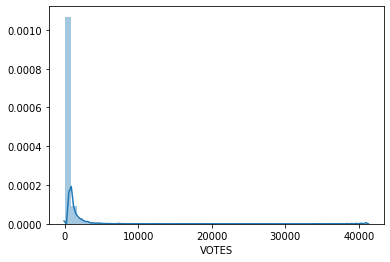

In [37]:
sns.distplot(df['VOTES'])
plt.show()

In [38]:

df['VOTES']=df['VOTES']+5
from scipy.stats import boxcox
df['VOTES']=boxcox(df['VOTES'],0)


In [39]:
#CUISINES Column

In [40]:
df['CUISINES'].nunique()

5183

In [41]:
df['CUISINES1']=df['CUISINES'].str.split(',').str[0]
df['CUISINES2']=df['CUISINES'].str.split(',').str[1]
df['CUISINES3']=df['CUISINES'].str.split(',').str[2]
df['CUISINES4']=df['CUISINES'].str.split(',').str[3]
df['CUISINES5']=df['CUISINES'].str.split(',').str[4]

In [42]:
df.isnull().sum()

CITY                 0
COST                 0
CUISINES             0
DATA                 0
LOCALITY             0
RATING               0
RESTAURANT_ID        0
TIME                 0
TITLE                0
VOTES                0
CUISINES1            0
CUISINES2         4047
CUISINES3         9330
CUISINES4        13309
CUISINES5        15550
dtype: int64

In [43]:
df['CUISINES2'].fillna('None',inplace=True)
df['CUISINES3'].fillna('None',inplace=True)
df['CUISINES4'].fillna('None',inplace=True)
df['CUISINES5'].fillna('None',inplace=True)

In [44]:
df['CUISINES1']=le.fit_transform(df['CUISINES1'])
df['CUISINES2']=le.fit_transform(df['CUISINES2'])
df['CUISINES3']=le.fit_transform(df['CUISINES3'])
df['CUISINES4']=le.fit_transform(df['CUISINES4'])
df['CUISINES5']=le.fit_transform(df['CUISINES5'])

In [45]:
df.drop(['CUISINES'],axis=1,inplace=True)

In [46]:
#TITLE Column

In [47]:
df['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [48]:
df['TITLE'].value_counts()

QUICK BITES                     5634
CASUAL DINING                   4910
None                            1287
CAFÉ                             830
DESSERT PARLOR                   508
CASUAL DINING,BAR                463
FINE DINING                      406
BAKERY                           392
BEVERAGE SHOP                    216
BAR,CASUAL DINING                175
LOUNGE                           136
BAKERY,QUICK BITES               126
BAR                              124
FOOD COURT                       110
KIOSK                             73
SWEET SHOP,QUICK BITES            70
MESS                              68
PUB                               67
SWEET SHOP                        67
CASUAL DINING,CAFÉ                65
DHABA                             61
BAKERY,DESSERT PARLOR             61
DESSERT PARLOR,QUICK BITES        57
QUICK BITES,SWEET SHOP            49
CAFÉ,CASUAL DINING                47
BEVERAGE SHOP,QUICK BITES         45
CAFÉ,BAKERY                       43
P

In [49]:
df['TITLE1']=df['TITLE'].str.split(',').str[0]
df['TITLE2']=df['TITLE'].str.split(',').str[1]


In [50]:
df.isnull().sum()

CITY                 0
COST                 0
DATA                 0
LOCALITY             0
RATING               0
RESTAURANT_ID        0
TIME                 0
TITLE                0
VOTES                0
CUISINES1            0
CUISINES2            0
CUISINES3            0
CUISINES4            0
CUISINES5            0
TITLE1               0
TITLE2           14977
dtype: int64

In [51]:
df.fillna('None',inplace=True)

In [52]:
df['TITLE1']=le.fit_transform(df['TITLE1'])
df['TITLE2']=le.fit_transform(df['TITLE1'])

In [53]:
df.drop(['TITLE'],axis=1,inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 15 columns):
CITY             16921 non-null int32
COST             16921 non-null int64
DATA             16921 non-null object
LOCALITY         16921 non-null int32
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
VOTES            16921 non-null float64
CUISINES1        16921 non-null int32
CUISINES2        16921 non-null int32
CUISINES3        16921 non-null int32
CUISINES4        16921 non-null int32
CUISINES5        16921 non-null int32
TITLE1           16921 non-null int32
TITLE2           16921 non-null int64
dtypes: float64(2), int32(8), int64(3), object(2)
memory usage: 1.5+ MB


In [55]:
df.drop(['TIME'],axis=1,inplace=True)

In [56]:
df.drop(['RESTAURANT_ID'],axis=1,inplace=True)

In [57]:
Trainfinal=df.loc[df['DATA']=='train']
Trainfinal.drop(['DATA'],axis=1,inplace=True)
Trainfinal.head()

,CITY,COST,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,401,1200,328,3.6,3.988984,61,32,71,89,83,5,5
1,75,1500,1215,4.2,3.555348,6,62,45,89,83,5,5
2,75,800,1273,3.8,5.420535,74,23,14,34,83,5,5
3,277,800,161,4.1,3.367296,102,23,100,89,83,23,23
4,277,300,709,3.8,5.135798,30,100,100,89,83,9,9


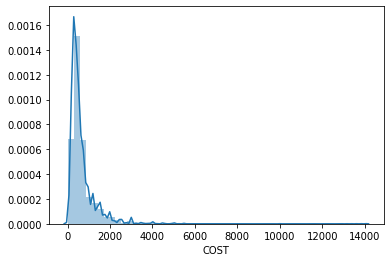

In [58]:
sns.distplot(Trainfinal['COST'])
plt.show()

In [59]:
Trainfinal['COST']=boxcox(Trainfinal['COST'],0)

In [60]:
Testfinal=df.loc[df['DATA']=='test']
Testfinal.drop(['COST'],axis=1,inplace=True)
Testfinal.drop(['DATA'],axis=1,inplace=True)


In [61]:
#separating independent and dependent variables
df_x=Trainfinal.drop(['COST'],axis=1)
y=Trainfinal['COST']

In [62]:
#Scaling the data using StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.25,random_state=42)

In [64]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(9517, 11) (3173, 11)
(9517,) (3173,)


In [65]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)
XGR=XGBRegressor(random_state=42)

In [66]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [67]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    mae=mean_absolute_error(y_test,pre)
    print("Mean_Absolute_Error =",mae)
    MAE.append(round(mae,3))
    score= cross_val_score(model,df_x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.3281000188698966
Mean_Squared_Error = 0.34416792824121495
Mean_Absolute_Error = 0.4418468861766965
Cross_Val_Score =  0.3337626563557965


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.000538677192244208
Mean_Squared_Error = 0.5125068214398142
Mean_Absolute_Error = 0.5644596052751033
Cross_Val_Score =  -0.000917289212167427


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.32810040669038176
Mean_Squ

In [68]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error':MAE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Cross_val_score
0,LinearRegression,0.328100,0.344,0.442,0.334
1,Lasso,-0.000539,0.513,0.564,-0.001
2,Ridge,0.328100,0.344,0.442,0.334
3,ElasticNet,-0.000539,0.513,0.564,-0.001
4,DecisionTreeRegressor,0.418711,0.298,0.414,0.429
5,KNeighborsRegressor,0.441679,0.286,0.399,0.461
6,AdaBoostRegressor,0.489028,0.262,0.395,0.476
7,RandomForestRegressor,0.664911,0.172,0.318,0.671
8,GradientBoostingRegressor,0.666505,0.171,0.318,0.679
9,XGBRegressor,0.713755,0.147,0.296,0.723


From the above table we can easily identify that our model is performing the best in XGB Regression algorithm.

In [69]:
#Lets use GridsearchCV for hyperparamenter tuning for XGBRegressor
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.25)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [70]:
pipeline=Pipeline([("ss",StandardScaler()),("XGR",XGBRegressor())])
parameters = {"XGR__n_estimators":[10,100,200,300,400,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(df_x,y)
clf.best_params_

{'XGR__n_estimators': 100}

In [71]:
pipeline_XGR=Pipeline([("ss",StandardScaler()),("XGR",XGBRegressor(n_estimators=100))])
maxr2_score(pipeline_XGR,df_x,y)

max r2 score corresponding to  61  is  0.7292665770184665


61

We can observe that r2 score has been increased after applying the GridsearchCV from 0.71 to 0.72
So, We canchoose XGB Regression algorithm as MSE is very less, MAE is also less and good R2 score. 
Hence XGB Regressor algorithm performs the best.
R2 Score=0.713755			
MSE=0.147
MAE=0.296
Cross Validation Score=0.723

In [72]:
from sklearn.externals import joblib
joblib.dump(XGR,'Food_Cost_XGR.pkl')

['Food_Cost_XGR.pkl']